In [58]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob as gb
import numpy as np


In [59]:
path = os.getcwd()+ '/archive/car_data/car_data'

In [60]:
train = path+"/train"
test = path+"/test"
train_labels = []
train_images = []
test_labels = []
test_images = []


In [61]:
train_path =  [folder for folder in os.listdir(train) if not folder.startswith('.')]
test_path =  [folder for folder in os.listdir(test) if not folder.startswith('.')]


## get # of photos for train & test
train_len = -1
for i in os.walk(train, topdown=True):
        train_len += len(i[2]) 

test_len = -1
for i in os.walk(test, topdown=True):
        test_len += len(i[2]) 

## add the type of cars into dict
d = dict()
idx = 0
for folder in test_path:
    d[folder] = idx
    idx+= 1

In [62]:
# Get image annotations
# Heading names: img_name, bbox_x1, bbox_y1, bbox_x2, bbox_y2, class
train_annot = pd.read_csv(os.getcwd() + "/archive/anno_train.csv")
test_annot = pd.read_csv(os.getcwd() + "/archive/anno_test.csv")

train_bboxes = []
test_bboxes = []

train_annot.keys()

Index(['img_name', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class'], dtype='object')

In [63]:
# Scale bbox values to image
"""
for row in train_annot:
    row = row.split(",")
    (img_name_train, bbox_x1_train, bbox_y1_train, bbox_x2_train, bbox_y2_train, lbl_train) = row

for row in test_annot:
    row = row.split(",")
    (img_name_test, bbox_x1_test, bbox_y1_test, bbox_x2_test, bbox_y2_test, lbl_test) = row

bbox_x1_train = float(bbox_x1_train)
bbox_y1_train = float(bbox_y1_train)
bbox_x2_train = float(bbox_x2_train)
bbox_y2_train = float(bbox_y2_train)

bbox_x1_test = float(bbox_x1_test)
bbox_y1_test = float(bbox_y1_test)
bbox_x2_test = float(bbox_x2_test)
bbox_y2_test = float(bbox_y2_test)

train_bboxes.append((bbox_x1_train, bbox_y1_train, bbox_x2_train, bbox_y2_train))
test_bboxes.append((bbox_x1_test, bbox_y1_test, bbox_x2_test, bbox_y2_test))
"""

'\nfor row in train_annot:\n    row = row.split(",")\n    (img_name_train, bbox_x1_train, bbox_y1_train, bbox_x2_train, bbox_y2_train, lbl_train) = row\n\nfor row in test_annot:\n    row = row.split(",")\n    (img_name_test, bbox_x1_test, bbox_y1_test, bbox_x2_test, bbox_y2_test, lbl_test) = row\n\nbbox_x1_train = float(bbox_x1_train)\nbbox_y1_train = float(bbox_y1_train)\nbbox_x2_train = float(bbox_x2_train)\nbbox_y2_train = float(bbox_y2_train)\n\nbbox_x1_test = float(bbox_x1_test)\nbbox_y1_test = float(bbox_y1_test)\nbbox_x2_test = float(bbox_x2_test)\nbbox_y2_test = float(bbox_y2_test)\n\ntrain_bboxes.append((bbox_x1_train, bbox_y1_train, bbox_x2_train, bbox_y2_train))\ntest_bboxes.append((bbox_x1_test, bbox_y1_test, bbox_x2_test, bbox_y2_test))\n'

In [64]:
for folder in test_path:
    jpg_path = gb.glob(pathname = test + "/" + folder + "/*.jpg")
    
    for img in jpg_path:
        img_name = os.path.basename(img)

        
        # Get bounding box value for image
        bbox_x1 = test_annot.loc[test_annot['img_name'] == img_name]['bbox_x1']
        bbox_y1 = test_annot.loc[test_annot['img_name'] == img_name]['bbox_y1']
        bbox_x2 = test_annot.loc[test_annot['img_name'] == img_name]['bbox_x2']
        bbox_y2 = test_annot.loc[test_annot['img_name'] == img_name]['bbox_y2']

        # Append bounding box value to array
        test_bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        
        
        image = cv2.imread(img)
        test_labels.append(np.array(d[folder]))
        image = cv2.resize(image, (224,224))
        test_images.append(np.array(image))

for folder in train_path:
    jpg_path = gb.glob(pathname = train + "/" + folder + "/*.jpg")
    
    for img in jpg_path:
        img_name = os.path.basename(img)

        
        # Get bounding box value for image
        bbox_x1 = train_annot.loc[train_annot['img_name'] == img_name]['bbox_x1']
        bbox_y1 = train_annot.loc[train_annot['img_name'] == img_name]['bbox_y1']
        bbox_x2 = train_annot.loc[train_annot['img_name'] == img_name]['bbox_x2']
        bbox_y2 = train_annot.loc[train_annot['img_name'] == img_name]['bbox_y2']
        
        # Append bounding box value to array
        train_bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        

        image = cv2.imread(img)
        train_labels.append(np.array(d[folder]))
        image = cv2.resize(image, (224,224))
        train_images.append(np.array(image))
        

In [65]:
# Scale bounding box to image resolution

for i in range(0, len(train_bboxes)):
    for j in range(0,4):
        train_bboxes[i][j] / 224

for i in range(0, len(test_bboxes)):
    for j in range(0,4):
        test_bboxes[i][j] / 224

# Convert from array of pandas series to floats
train_bboxes = np.array(train_bboxes, dtype="float64")
test_bboxes = np.array(test_bboxes, dtype="float64")


In [66]:
train_bboxes.shape

(131, 4, 1)

In [67]:
train_labels = np.array(train_labels)
train_labels = np.reshape(train_labels, (-1, 1))

test_labels = np.array(test_labels)
test_labels = np.reshape(test_labels, (-1, 1))

train_images = np.array(train_images)
test_images = np.array(test_images)


In [68]:
print(test_labels)
print(test_labels.shape)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
(129, 1)


In [69]:
train_images, test_images= train_images / 255.0, test_images/ 255.0


In [70]:
from keras import layers
from keras.models import Model
from keras.applications import VGG16
model = VGG16(weights="imagenet", include_top=False, input_tensor=layers.Input(shape=(224, 224, 3)))

model.trainable=False

flatten = model.output
flatten = layers.Flatten() (flatten)

"""
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
"""

"\nmodel.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))\n"

In [71]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [72]:
# Fully connected layer header for bounding boxes
"""
bbox_output = layers.Dense(128, activation='relu') (flatten)
bbox_output = layers.Dense(64, activation='relu') (bbox_output)
bbox_output = layers.Dense(32, activation='relu') (bbox_output)
bbox_output = layers.Dense(4, activation="sigmoid", name="bbox") (bbox_output)
"""

'\nbbox_output = layers.Dense(128, activation=\'relu\') (flatten)\nbbox_output = layers.Dense(64, activation=\'relu\') (bbox_output)\nbbox_output = layers.Dense(32, activation=\'relu\') (bbox_output)\nbbox_output = layers.Dense(4, activation="sigmoid", name="bbox") (bbox_output)\n'

In [73]:
# Second fully connected layer header for predicting class label
label_output = layers.Dense(512, activation="relu")(flatten)
label_output = layers.Dropout(0.5) (label_output)
label_output = layers.Dense(512, activation="relu") (label_output)
label_output = layers.Dropout(0.5) (label_output)
label_output = layers.Dense(3, activation="softmax", name="class_label") (label_output)

model = Model(inputs=model.input, outputs=(label_output))
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [74]:
for folder in train_path:
    jpg_path = gb.glob(pathname = test + "/" + folder + "/*.jpg")
    
    for img in jpg_path:
        img_name = os.path.basename(img)
        image = cv2.imread(img)
        np.append(test_labels,np.array(folder))
        image = cv2.resize(image, (224,224))
        np.append(test_images,np.array(image))

In [75]:
# Set losses for both fully-connected layer headers
from keras.losses import SparseCategoricalCrossentropy

losses = {
    "class_label": SparseCategoricalCrossentropy(from_logits=False)#,"bbox": "mean_squared_error"
}

lossWeights = {
    "class_label": 1.0#,"bbox": 1.0
}

# Set targets
train_targets = {
    "class_label": train_labels#,"bbox": train_bboxes
}

test_targets = {
    "class_label": test_labels#,"bbox": test_bboxes
}

In [76]:
model.compile(optimizer='adam',
              loss=losses, loss_weights=lossWeights,
              metrics=['accuracy'])

history = model.fit(train_images, train_targets, epochs=10,
                    validation_data=(test_images, test_targets), batch_size=32, verbose=1)

Epoch 1/10
5/5 [==============================] - 26s 6s/step - loss: 3.7399 - accuracy: 0.3740 - val_loss: 5.2293 - val_accuracy: 0.3411
Epoch 2/10
5/5 [==============================] - 25s 6s/step - loss: 4.9611 - accuracy: 0.3053 - val_loss: 2.3810 - val_accuracy: 0.3488
Epoch 3/10
5/5 [==============================] - 25s 5s/step - loss: 3.3408 - accuracy: 0.4733 - val_loss: 1.4064 - val_accuracy: 0.4574
Epoch 4/10
5/5 [==============================] - 25s 5s/step - loss: 2.6004 - accuracy: 0.5420 - val_loss: 0.6695 - val_accuracy: 0.6589
Epoch 5/10
5/5 [==============================] - 25s 5s/step - loss: 2.1224 - accuracy: 0.5878 - val_loss: 0.6368 - val_accuracy: 0.7442
Epoch 6/10
5/5 [==============================] - 25s 5s/step - loss: 1.3528 - accuracy: 0.6947 - val_loss: 0.6342 - val_accuracy: 0.7364
Epoch 7/10
5/5 [==============================] - 25s 5s/step - loss: 0.9250 - accuracy: 0.7634 - val_loss: 1.5705 - val_accuracy: 0.6124
Epoch 8/10
5/5 [==================

In [77]:
model.trainable=True

model.summary()

5/5 [==============================] - 12s 2s/step


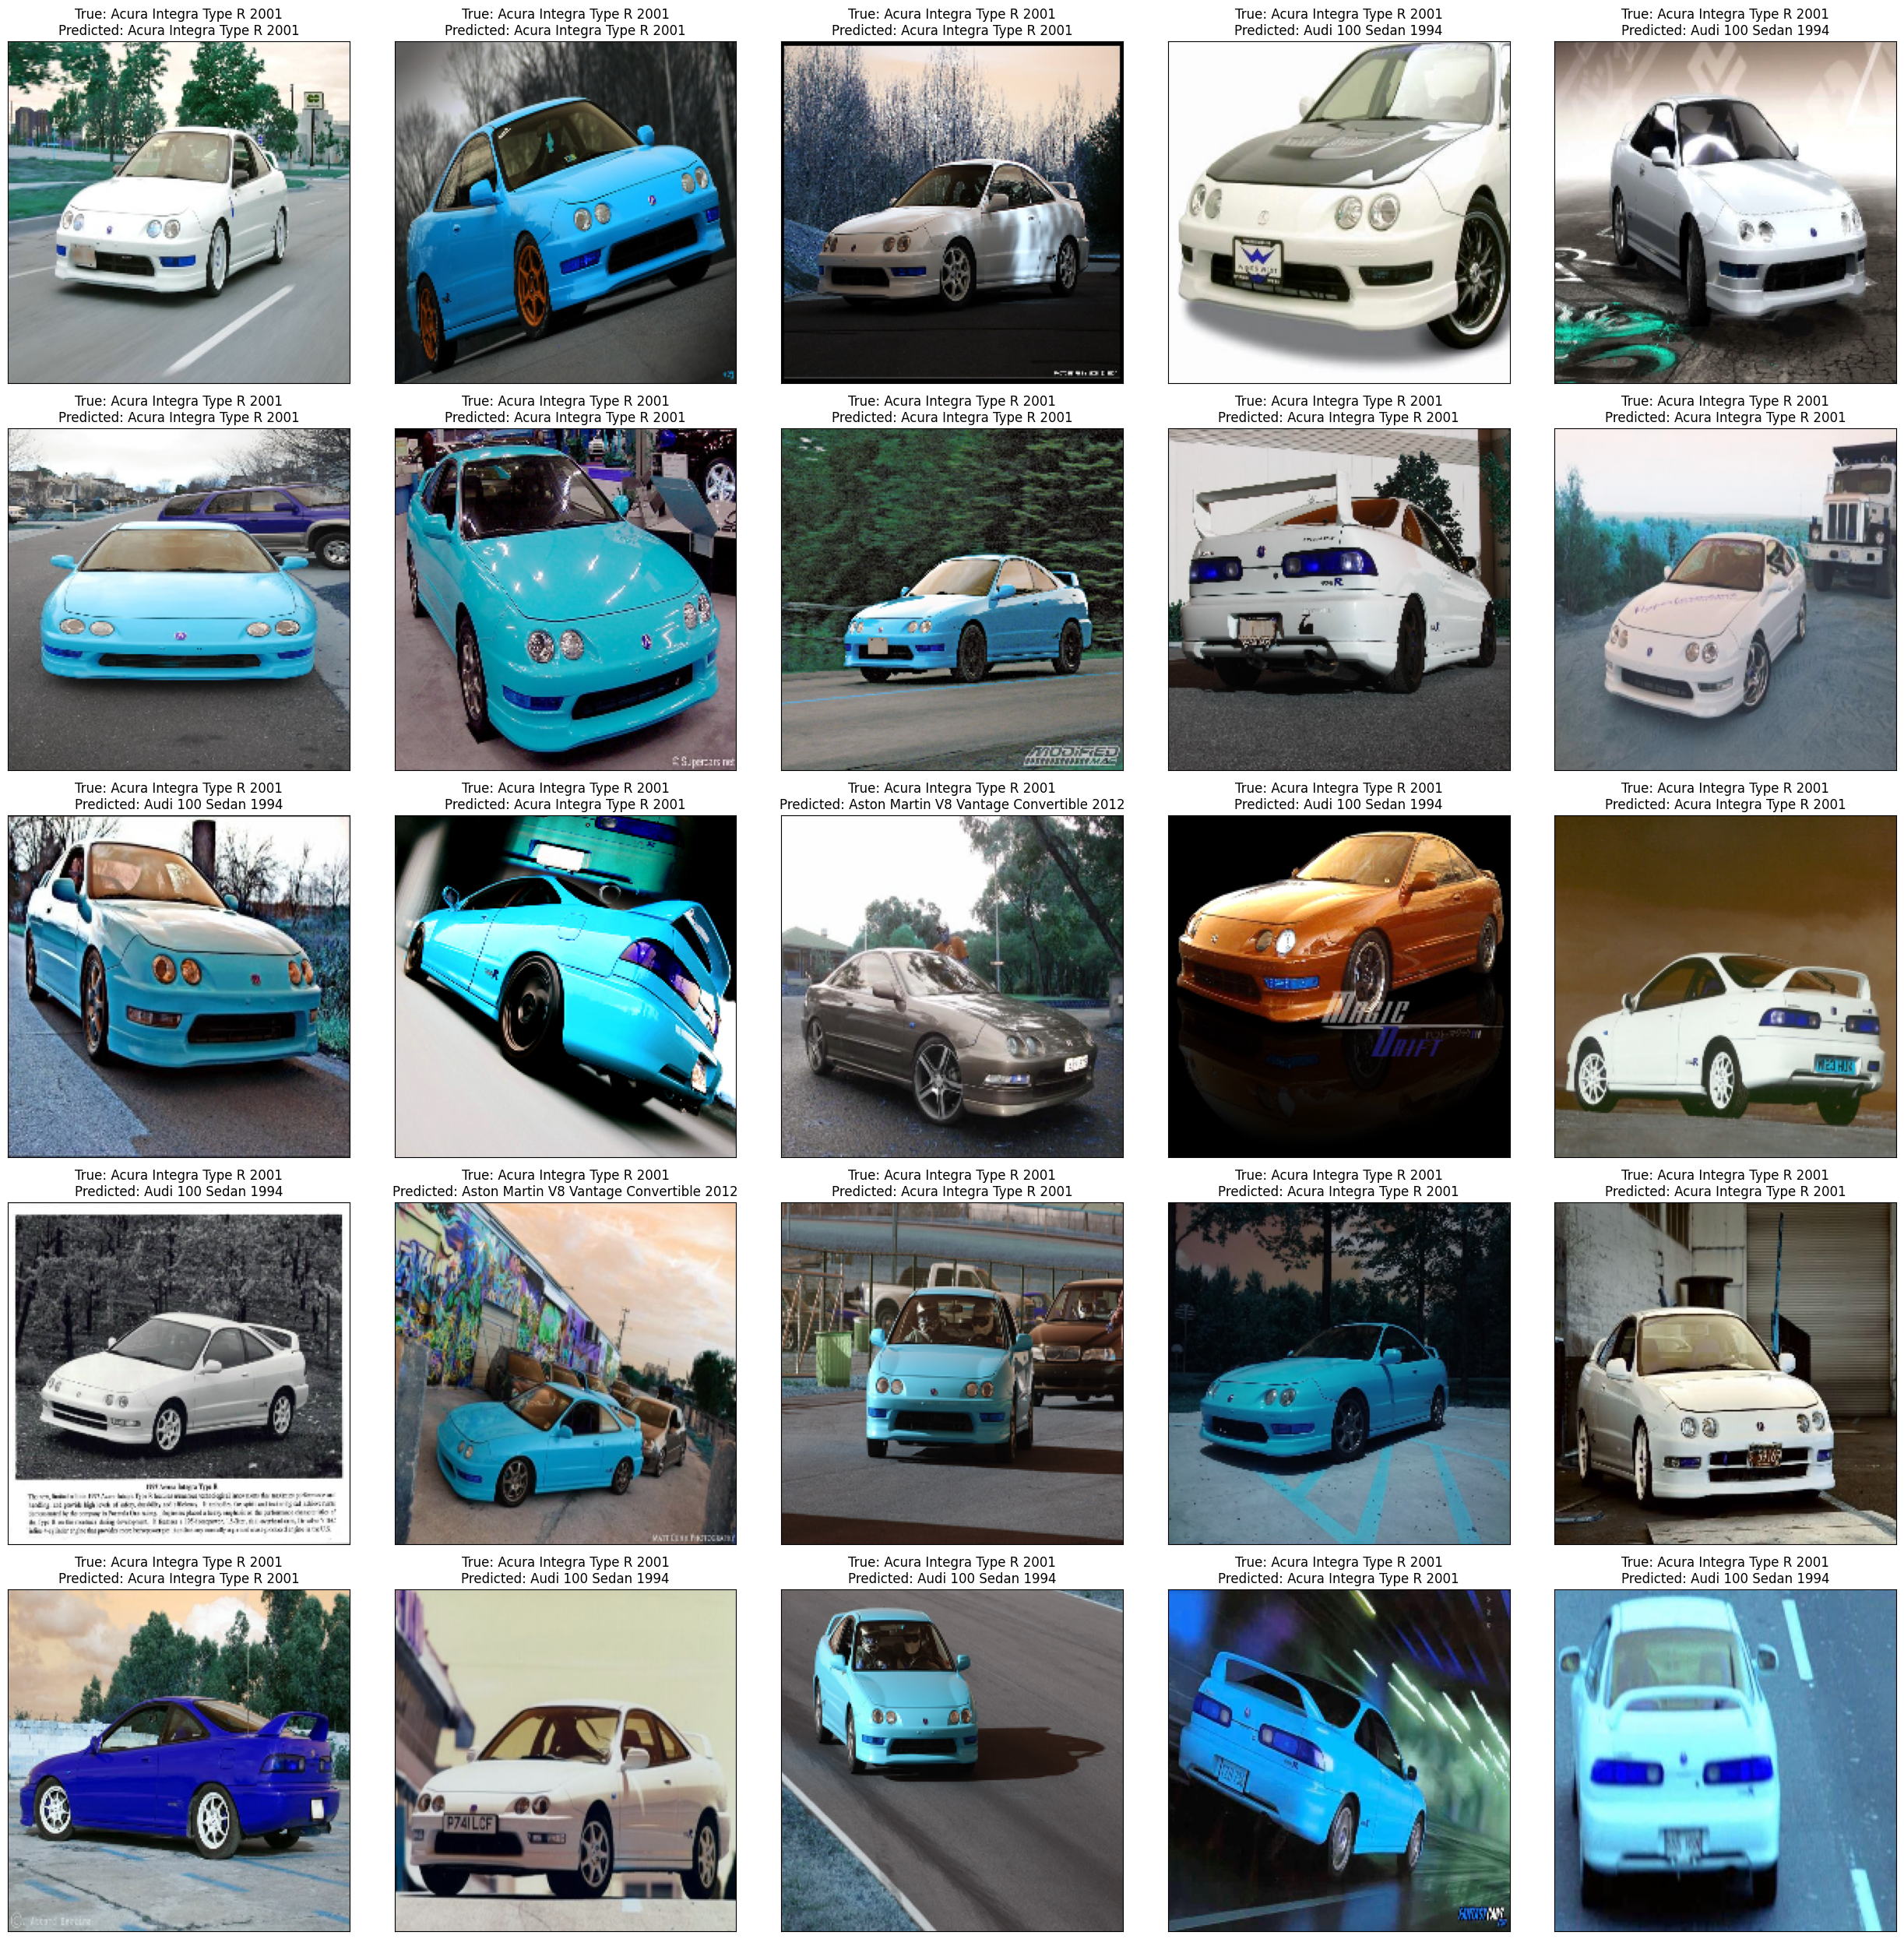

In [78]:
y_pred = model.predict(test_images)
pred_label = np.argmax(y_pred,axis = 1)
plt.figure(figsize=(25,25))

def getLabel(i):
    return (list(d.keys())[list(d.values()).index(i)])  

for i in range(25):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(test_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.title("True: " + getLabel(test_labels[i][0]) + "\n" + "Predicted: " + getLabel(pred_label[i]))
plt.tight_layout()
plt.show()

In [80]:
loss, acc = model.evaluate(test_images, test_labels, batch_size=32)

print('acc', acc)
print("loss", loss)

5/5 [==============================] - 13s 2s/step - loss: 0.5859 - accuracy: 0.7907
acc 0.7906976938247681
loss 0.585946261882782
